<a href="https://colab.research.google.com/github/Jasongiks/Trial/blob/main/Afterwork_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question
You have been given a dataset published by the Stockholm International Peace Research Institute. Your task will be to perform clustering and provide a descriptive analysis report for each cluster, highlighting how each cluster is different from the other. 
In addition, you will be required to create a model that can accurately classify new nuclear test explosions using the new label. 


### b) Defining Metric of Success
1. to get clusters with clear boundaries.
2. To create a classification model with a 90% accuracy level.

### c) Understanding the Context
There has been quite a large number of nuclear explosions in the past, with nuclear test explosions being the most. Such tests have been done on test sites on land or waters owned, controlled or leased from the owners by one of the eight nuclear nations: the United States, the Soviet Union, United Kingdom, France, China, India, Pakistan or North Korea, or has been done on or over ocean sites far from territorial waters. 

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Preparation
* Data Modeling (Clustering)
* Model Evaluation
* Data Analysis of the Clusters (Univariate and Bivariate)
* Data Modeling (Classification Model)
* Classification Model Evaluation.
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

Since the dataset dataset was sourced from the Stockholm International Peace Research Institute, it is relevant to answering the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
#importing our dataset
df = pd.read_csv('https://bit.ly/31lRemF')
#previewing the first 5 records of our dataset
df.head()

,date_long,year,id_no,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,name,type
0,19450716,1945,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER
1,19450805,1945,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP
2,19450809,1945,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP
3,19460630,1946,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP
4,19460724,1946,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW


In [ ]:
#getting the shape of our dataset
df.shape

(2051, 16)

In [ ]:
#getting the datatypes in our variables
df.dtypes

date_long              int64
year                   int64
id_no                  int64
country               object
region                object
source                object
latitude             float64
longitude            float64
magnitude_body       float64
magnitude_surface    float64
depth                float64
yield_lower          float64
yield_upper          float64
purpose               object
name                  object
type                  object
dtype: object

In [ ]:
#eliminating any duplicates in our dataset and rechecking the shape of the dataset
df.drop_duplicates(inplace = True)
df.shape

(2051, 16)

Since the shape remains unchanged, there are no duplicates in our dataset.

In [ ]:
#checking for any missing variables in our dataset as a percentage of the total dataset
df.isnull().mean()*100

date_long             0.000000
year                  0.000000
id_no                 0.000000
country               0.000000
region                0.000000
source                0.000000
latitude              0.000000
longitude             0.000000
magnitude_body        0.000000
magnitude_surface     0.000000
depth                 0.000000
yield_lower           0.146270
yield_upper           0.243784
purpose               0.048757
name                 32.423208
type                  0.000000
dtype: float64

In [ ]:
#Due the large number of missing values in the name variable, we can drop that column
#Due the low number of missing values in the other columns, we can drop rows with 
# a missing value without affecting the integrity of our dataset
df.drop(columns=['name'], inplace = True)
df.dropna(axis = 0, how = 'any', inplace = True)
df.isna().any()

date_long            False
year                 False
id_no                False
country              False
region               False
source               False
latitude             False
longitude            False
magnitude_body       False
magnitude_surface    False
depth                False
yield_lower          False
yield_upper          False
purpose              False
type                 False
dtype: bool

In [ ]:
#getting the shape of the dataset
df.shape

(2045, 15)

In [ ]:
#converting the date_long variable into the propoer datetime
df['date_long']=pd.to_datetime(df['date_long'],format='%Y%m%d')
df.sample(3)

,date_long,year,id_no,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,type
751,1966-05-19,1966,66026,USA,NTS,ISC,37.11,-116.03,5.9,0.0,0.0,20.0,200.0,WR,SHAFT
705,1965-09-10,1965,65037,UK,NTS,ISC,36.98,-115.99,5.1,0.0,0.0,20.0,200.0,WR,SHAFT
864,1968-01-24,1968,68063,USA,NTS,DOE,37.00,-116.00,0.0,0.0,0.0,0.0,20.0,WR,SHAFT


In [ ]:
#Since the date_long and year variables have the same information, we can drop the date_long variable
df.drop(columns = ['date_long'], inplace = True)
#Since the id_no column is a unique identifier for each nuclear test, we can also drop it
df.drop(columns=['id_no'], inplace = True)

In [ ]:
df.shape

(2045, 13)

In [ ]:
#getting the outliers in our dataset
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
outliers_df = df[((df<(q1-1.5*iqr))| (df>q3+1.5*iqr)).any(axis = 1)]
#getting the percentage of our data that are outliers
percent = (outliers_df.shape[0]/df.shape[0])*100
percent

43.52078239608802

43% of our data contains outliers. We can't eliminate the outliers since doing by doing so, we will lose a lot of data.

# <font color='#2F4F4F'>3. Data Analysis</font>

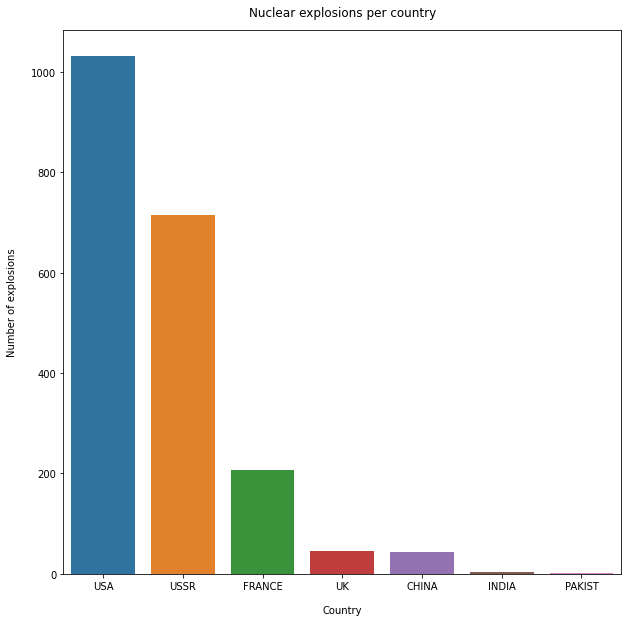

In [ ]:
#getting the number of nuclear explosions per country
plt.figure(figsize=(10,10))
total = df['country'].value_counts()
sns.barplot(x = total.index, y = total.values)
plt.title("Nuclear explosions per country", pad = 14)
plt.xlabel("Country", labelpad = 14)
plt.ylabel("Number of explosions", labelpad=14)
plt.show()

USA has had the most number of explosions while pakistan has had the least.

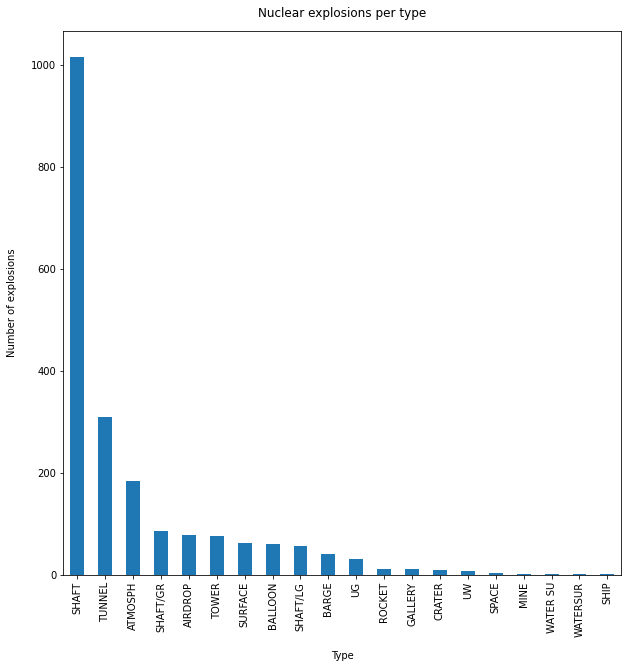

In [ ]:
#what are the numbers of explosion per type
plt.figure(figsize=(10,10))
df["type"].value_counts().plot(kind = 'bar')
plt.title("Nuclear explosions per type", pad = 14)
plt.xlabel("Type", labelpad = 14)
plt.ylabel("Number of explosions", labelpad=14)
plt.show()

most explosions were deployed from an underground vertical shaft, while the least number were from ships

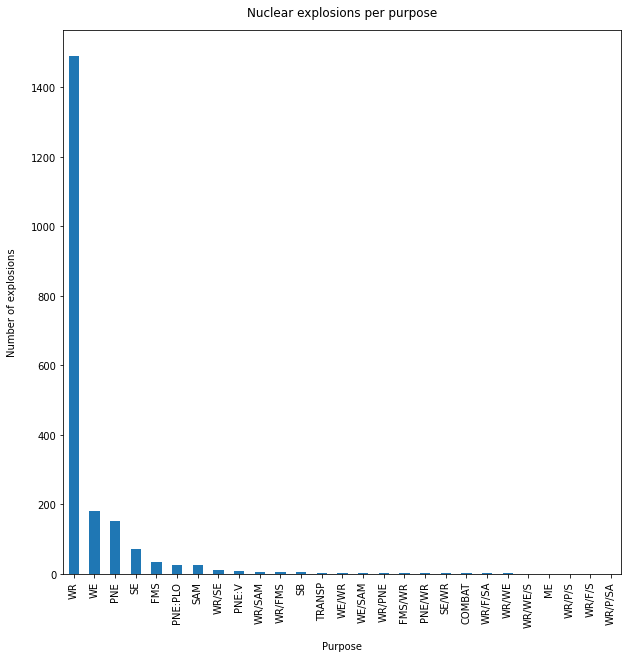

In [ ]:
#what are the numbers of explosion per purpose
plt.figure(figsize=(10,10))
df["purpose"].value_counts().plot(kind = 'bar')
plt.title("Nuclear explosions per purpose", pad = 14)
plt.xlabel("Purpose", labelpad = 14)
plt.ylabel("Number of explosions", labelpad=14)
plt.show()

most explosions were from weapons development programs.

# <font color='#2F4F4F'>4. Clustering</font>

In [ ]:
#copying the dataset so that any changes we make does not affect the original dataset
n_df = df.copy()
n_df.shape

(2045, 13)

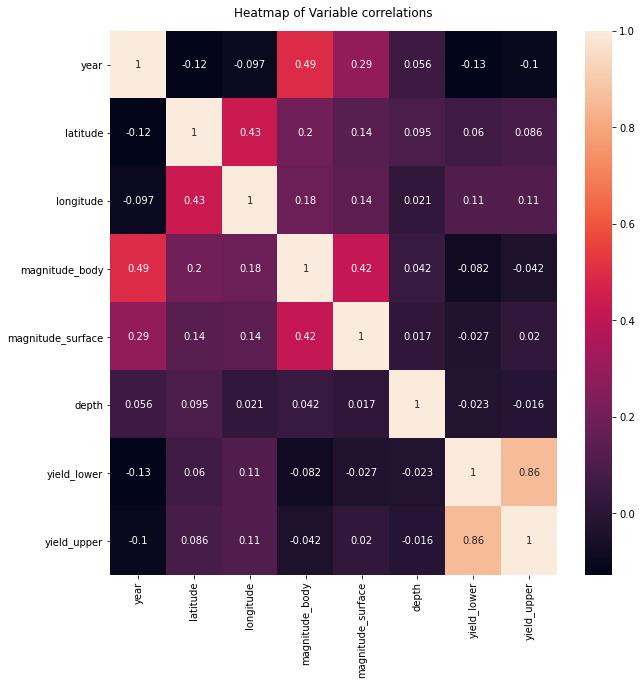

In [ ]:
#checking and displaying the correlations of our variables
cor = n_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(cor, annot=True)
plt.title("Heatmap of Variable correlations", pad = 14)
plt.show()

In [ ]:
#getting the number of unique values in our dataset
cols = n_df.columns.to_list()
for i in cols:
  print("Variable: ", i)
  print("Number of unique variables: ", df[i].nunique())
  print()

Variable:  year
Number of unique variables:  50

Variable:  country
Number of unique variables:  7

Variable:  region
Number of unique variables:  79

Variable:  source
Number of unique variables:  13

Variable:  latitude
Number of unique variables:  524

Variable:  longitude
Number of unique variables:  572

Variable:  magnitude_body
Number of unique variables:  43

Variable:  magnitude_surface
Number of unique variables:  26

Variable:  depth
Number of unique variables:  137

Variable:  yield_lower
Number of unique variables:  308

Variable:  yield_upper
Number of unique variables:  310

Variable:  purpose
Number of unique variables:  27

Variable:  type
Number of unique variables:  20



In [ ]:
#To perform our clustering, we would need to standardise our variables which requires we encode
#them first
#listing the variables to encode
var = ['country','region','source','purpose','type']
var_2 = ['country_2','region_2','source_2','purpose_2','type_2']
y = 0
#performing label encoding for these variables
for i in var:
  #first converting our variables into categorical variables
  n_df[i]=n_df[i].astype('category')
  #performing label encoding
  n_df[var_2[y]]=n_df[i].cat.codes
  y=y+1
n_df.head()

,year,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,type,country_2,region_2,source_2,purpose_2,type_2
0,1945,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TOWER,5,0,2,16,14
1,1945,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,AIRDROP,5,24,2,0,0
2,1945,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,AIRDROP,5,54,2,0,0
3,1946,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,AIRDROP,5,9,2,13,0
4,1946,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,UW,5,9,2,13,17


In [ ]:
#Selecting our variables
X= n_df.iloc[:,[0,4,5,6,7,8,9,10,13,14,15,16,17]]
#importing our scaler and fitting it to our dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
'''We are going to perform Kmeans and Agglomerative Clustering
Once we verify the number of clusters that we can get from both methods match,
we wil chose one and stick with it'''

#importing our clusterers
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

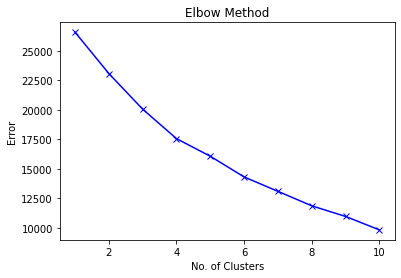

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
#We first determine the clusters from the kmeans model using the silhouette method
#We will use a range of 10 clusters to determine the optimal number of clusters.
#from sklearn.metrics import silhouette_score
from google.colab import files
Error = []
r = range(1,11)
for i in r:
  kmean = KMeans(n_clusters=i,random_state = 0)
  kmean.fit(X)
  Error.append(kmean.inertia_)
#plotting the elbow method graph
plt.plot(r,Error,'bx-')
plt.title('Elbow Method')
plt.xlabel("No. of Clusters")
plt.ylabel("Error")
plt.show()
plt.savefig('Elbow method.jpg')
files.download('Elbow method.jpg')

The cluster at the elbow point is 4 clusters. Let's verify this with a dendrogram

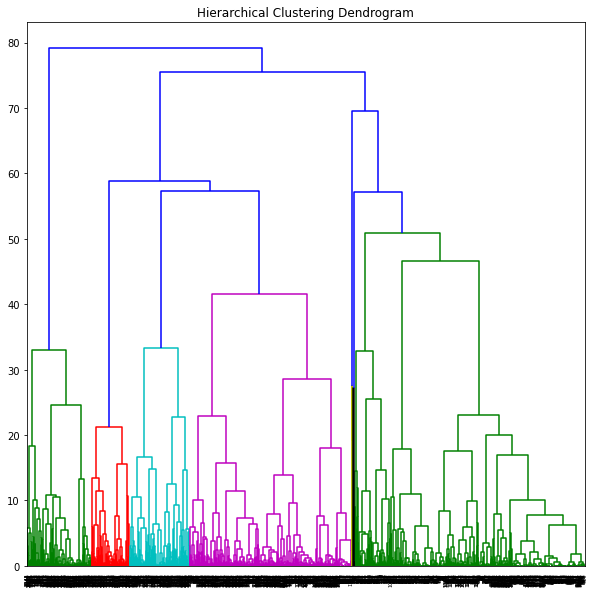

In [ ]:
#for the agglomerative clustering, we will plot a dendrogram to get the number of clusters in our dataset
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,10))
plt.title("Hierarchical Clustering Dendrogram")
dend = shc.dendrogram(shc.linkage(X, method = 'ward'))

If we were to draw a horizontal line that passes through longest distance without a horizontal line, our line would cut the blue line four times. This means that 4 is the optimal no. of clusters. 
This corresponds with the value from the elbow method.

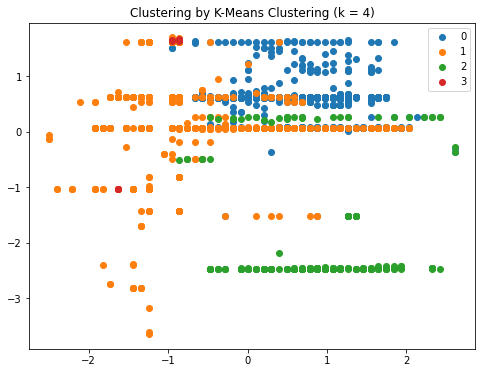

In [ ]:
#modelling our clusters with the KMeans method with k=4
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X)

#visualising
kmeans_pred = kmeans.labels_
kmeans_clust = np.unique(kmeans_pred)

plt.figure(figsize = (8, 6))
for cluster in kmeans_clust:
    row_ix = np.where(kmeans_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by K-Means Clustering (k = 4)")
plt.legend()
plt.show()

In [ ]:
# add these cluster labels to our dataset
n_df['KMeans Cluster Group']=kmeans.predict(X)

# previewing a sample of our dataset
n_df.head(10)

,year,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,type,country_2,region_2,source_2,purpose_2,type_2,KMeans Cluster Group
0,1945,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TOWER,5,0,2,16,14,1
1,1945,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,AIRDROP,5,24,2,0,0,1
2,1945,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,AIRDROP,5,54,2,0,0,1
3,1946,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,AIRDROP,5,9,2,13,0,1
4,1946,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,UW,5,9,2,13,17,1
5,1948,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.08,37.0,37.0,WR,TOWER,5,16,2,16,14,1
6,1948,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.08,49.0,49.0,WR,TOWER,5,16,2,16,14,1
7,1948,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.08,18.0,18.0,WR,TOWER,5,16,2,16,14,1
8,1949,USSR,SEMI KAZAKH,DOE,48.00,76.00,0.0,0.0,0.00,22.0,22.0,WR,SURFACE,6,68,2,16,13,1
9,1951,USA,NTS,DOE,37.00,-116.00,0.0,0.0,-0.35,1.0,1.0,WR,AIRDROP,5,56,2,16,0,1


In [ ]:
#creating dataframes for the different cluster groups
#Cluster 1
clust_1 = n_df[n_df['KMeans Cluster Group'].isin([0])]
clust_1.sample(3)

,year,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,type,country_2,region_2,source_2,purpose_2,type_2,KMeans Cluster Group
965,1969,USSR,SEMI KAZAKH,ISC,49.76,78.20,5.2,0.0,0.000,0.001,20.0,PNE/WR,TUNNEL,6,68,4,5,15,0
1317,1975,USA,NTS,ISC,37.28,-116.41,6.4,5.4,1.265,200.000,1000.0,WR,SHAFT,5,56,4,16,8,0
1207,1973,USSR,NZ RUSS,UGS,73.30,55.20,6.8,5.0,0.000,150.000,10000.0,WR,TUNNEL,6,57,10,16,15,0


In [ ]:
#Cluster 2
clust_2 = n_df[n_df['KMeans Cluster Group'].isin([1])]
clust_2.sample(3)

,year,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,type,country_2,region_2,source_2,purpose_2,type_2,KMeans Cluster Group
38,1953,USA,NTS,DOE,37.00,-116.00,0.0,0.0,-0.1,16.0,16.0,WR,TOWER,5,56,2,16,14,1
876,1968,USA,NTS,ISC,37.12,-116.08,4.6,0.0,0.0,0.0,200.0,WR,SHAFT,5,56,4,16,8,1
235,1958,UK,CHRISTMAS IS,DOE,2.00,-157.00,0.0,0.0,0.0,24.0,24.0,WR,BALLOON,4,14,2,16,2,1


In [ ]:
#Cluster 3
clust_3 = n_df[n_df['KMeans Cluster Group'].isin([2])]
clust_3.sample(3)

,year,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,type,country_2,region_2,source_2,purpose_2,type_2,KMeans Cluster Group
1664,1982,FRANCE,MURUROA,SPA,-22.000,-139.000,0.0,0.0,0.0,0.0,5.0,WR,SHAFT/GR,1,52,9,16,9,2
1919,1987,FRANCE,HURUROA,WTN,-21.878,-139.037,0.0,0.0,0.0,0.0,150.0,WR,SHAFT/LG,1,26,11,16,10,2
1901,1987,FRANCE,MURUROA,WTN,-21.984,-138.844,0.0,0.0,0.0,0.0,150.0,WR,SHAFT/LG,1,52,11,16,10,2


In [ ]:
#Cluster 4
clust_4 = n_df[n_df['KMeans Cluster Group'].isin([3])]
clust_4.sample(3)

,year,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,type,country_2,region_2,source_2,purpose_2,type_2,KMeans Cluster Group
480,1962,USSR,NZ RUSS,UGS,74.30,52.4,0.0,0.0,0.000,10000.0,50000.0,WR,ATMOSPH,6,57,10,16,1,3
56,1954,USA,BIKINI,DOE,11.35,165.2,0.0,0.0,-0.001,15000.0,15000.0,WR,SURFACE,5,9,2,16,13,3
548,1962,USSR,NZ RUSS,UGS,74.20,52.3,0.0,0.0,0.000,24200.0,24200.0,WR,ATMOSPH,6,57,10,16,1,3


# <font color='#2F4F4F'>5. Cluster Analysis</font>

### a) Cluster 1

In [ ]:
clust_1.shape

(770, 19)

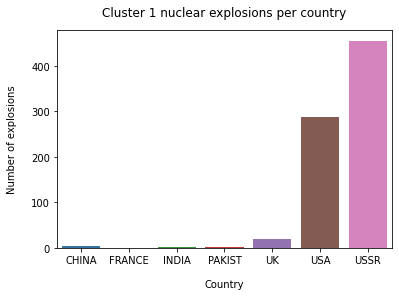

In [ ]:
#nuclear explosions per country
tot = clust_1['country'].value_counts()
sns.barplot(x = tot.index, y=tot.values)
plt.title("Cluster 1 nuclear explosions per country",pad = 14)
plt.xlabel('Country', labelpad = 14)
plt.ylabel('Number of explosions', labelpad = 14)
plt.show()

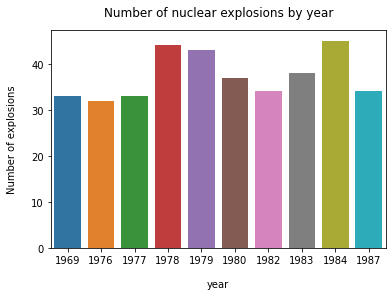

In [ ]:
#Getting the years with the highest number of explosions
yr = clust_1['year'].value_counts()[:10]
sns.barplot(x = yr.index, y=yr.values)
plt.title("Number of nuclear explosions by year",pad = 14)
plt.xlabel('year', labelpad = 14)
plt.ylabel('Number of explosions', labelpad = 14)
plt.show()

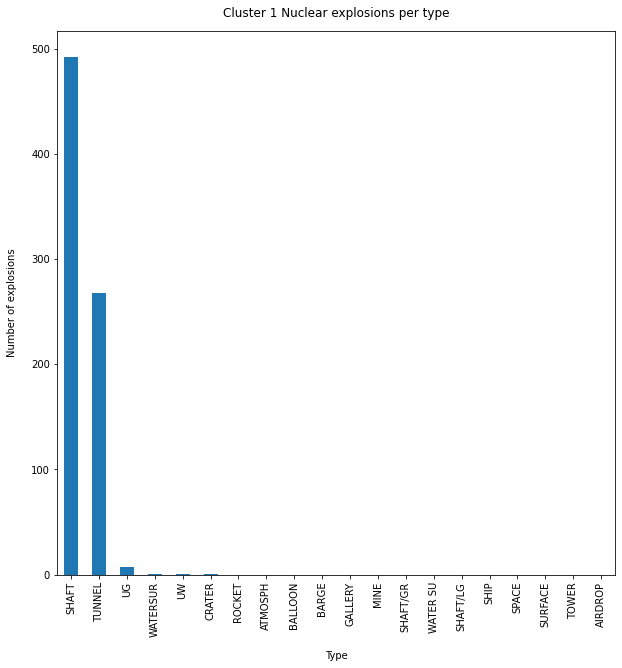

In [ ]:
#what are the numbers of explosion per type
plt.figure(figsize=(10,10))
clust_1["type"].value_counts().plot(kind = 'bar')
plt.title("Cluster 1 Nuclear explosions per type", pad = 14)
plt.xlabel("Type", labelpad = 14)
plt.ylabel("Number of explosions", labelpad=14)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

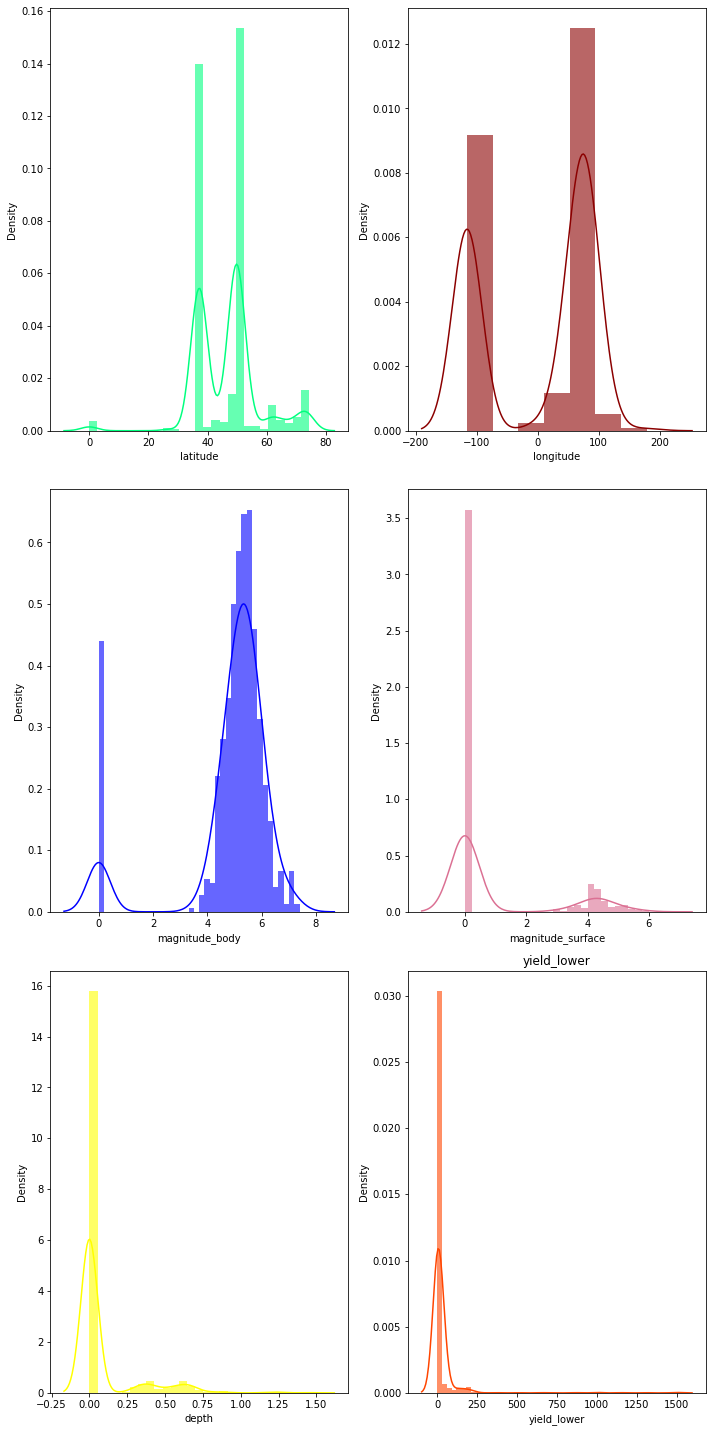

In [ ]:
# previewing the histograms of each variable
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 20))

cols = ['latitude','longitude','magnitude_body','magnitude_surface','depth','yield_lower']
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.distplot(clust_1[col], ax = ax, color = color, hist_kws = dict(alpha = 0.6),)
    plt.title(col)
    
plt.tight_layout()

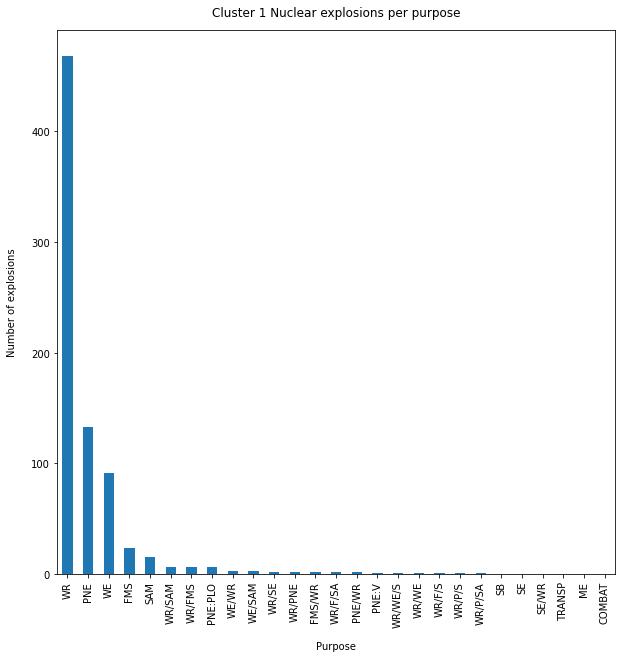

In [ ]:
#what are the numbers of explosion per type
plt.figure(figsize=(10,10))
clust_1["purpose"].value_counts().plot(kind = 'bar')
plt.title("Cluster 1 Nuclear explosions per purpose", pad = 14)
plt.xlabel("Purpose", labelpad = 14)
plt.ylabel("Number of explosions", labelpad=14)
plt.show()

### b) Cluster 2

In [ ]:
clust_2.shape

(1036, 19)

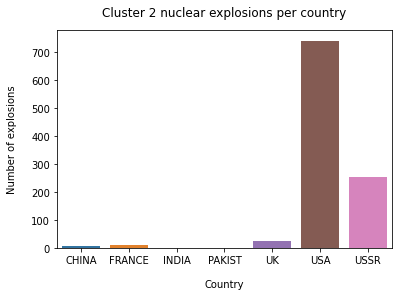

In [ ]:
#nuclear explosions per country
tot2 = clust_2['country'].value_counts()
sns.barplot(x = tot2.index, y=tot2.values)
plt.title("Cluster 2 nuclear explosions per country",pad = 14)
plt.xlabel('Country', labelpad = 14)
plt.ylabel('Number of explosions', labelpad = 14)
plt.show()

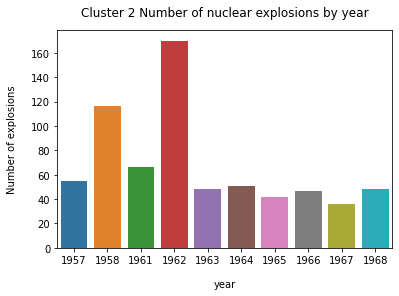

In [ ]:
yr2 = clust_2['year'].value_counts()[:10]
sns.barplot(x = yr2.index, y=yr2.values)
plt.title("Cluster 2 Number of nuclear explosions by year",pad = 14)
plt.xlabel('year', labelpad = 14)
plt.ylabel('Number of explosions', labelpad = 14)
plt.show()

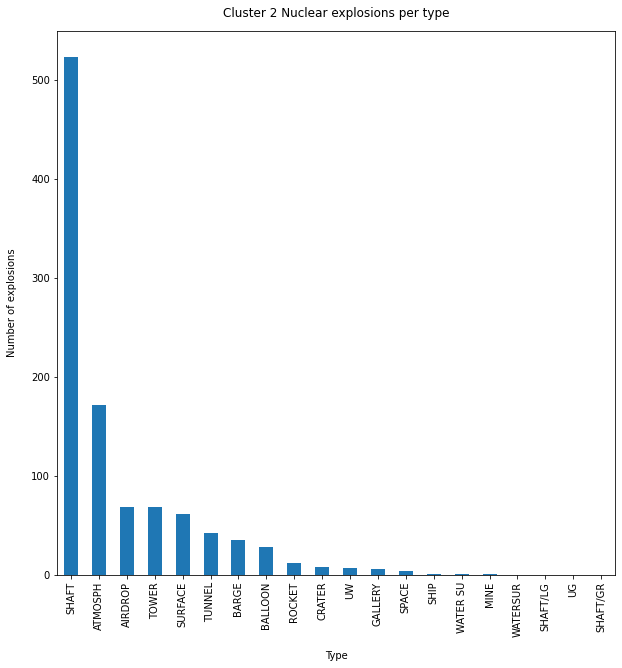

In [ ]:
#what are the numbers of explosion per type
plt.figure(figsize=(10,10))
clust_2["type"].value_counts().plot(kind = 'bar')
plt.title("Cluster 2 Nuclear explosions per type", pad = 14)
plt.xlabel("Type", labelpad = 14)
plt.ylabel("Number of explosions", labelpad=14)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

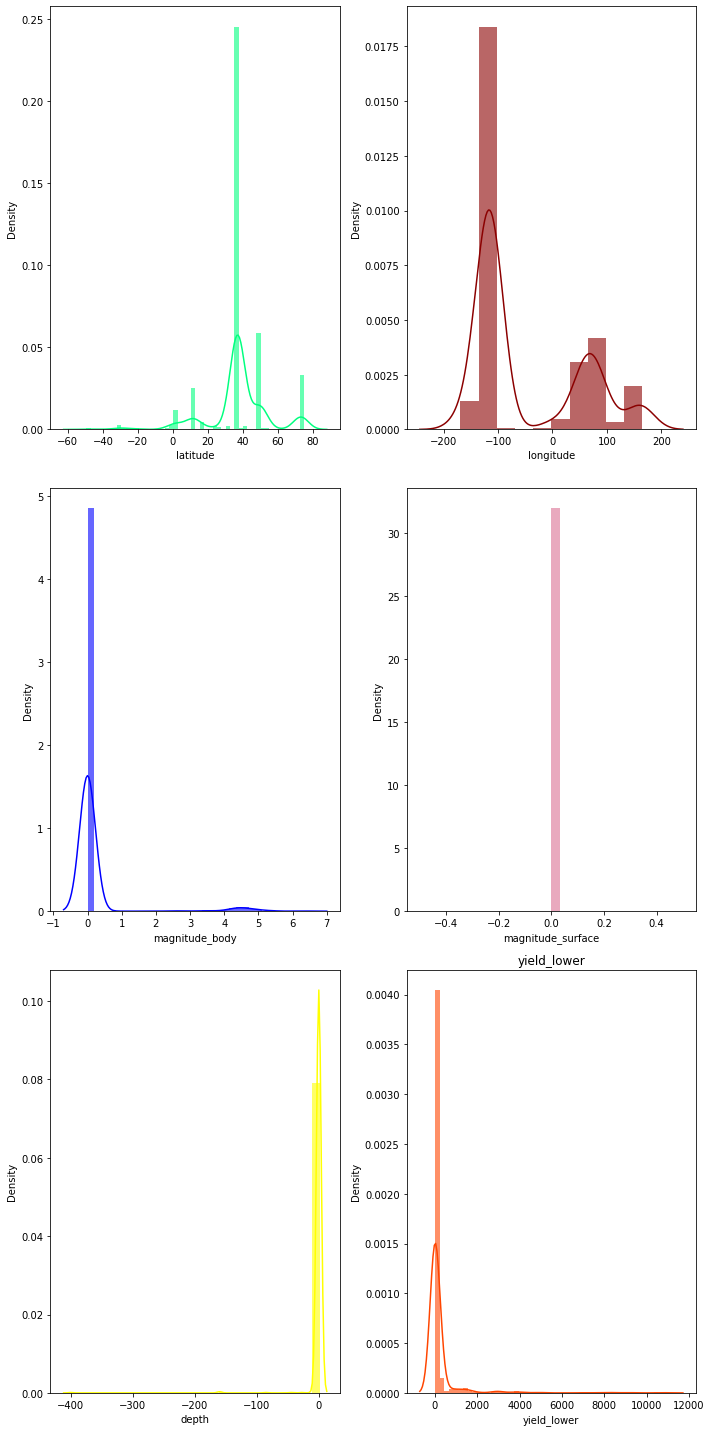

In [ ]:
# previewing the histograms of each variable
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 20))

cols = ['latitude','longitude','magnitude_body','magnitude_surface','depth','yield_lower']
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.distplot(clust_2[col], ax = ax, color = color, hist_kws = dict(alpha = 0.6),)
    plt.title(col)
    
plt.tight_layout()

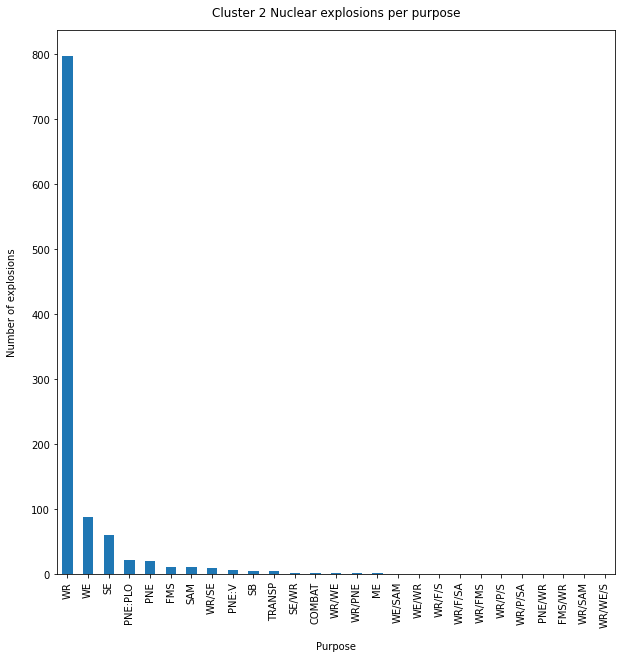

In [ ]:
#what are the numbers of explosion per type
plt.figure(figsize=(10,10))
clust_2["purpose"].value_counts().plot(kind = 'bar')
plt.title("Cluster 2 Nuclear explosions per purpose", pad = 14)
plt.xlabel("Purpose", labelpad = 14)
plt.ylabel("Number of explosions", labelpad=14)
plt.show()

### c) Cluster 3

In [ ]:
clust_3.shape

(231, 19)

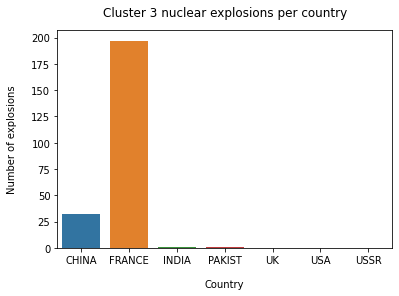

In [ ]:
#nuclear explosions per country
tot3 = clust_3['country'].value_counts()
sns.barplot(x = tot3.index, y=tot3.values)
plt.title("Cluster 3 nuclear explosions per country",pad = 14)
plt.xlabel('Country', labelpad = 14)
plt.ylabel('Number of explosions', labelpad = 14)
plt.show()

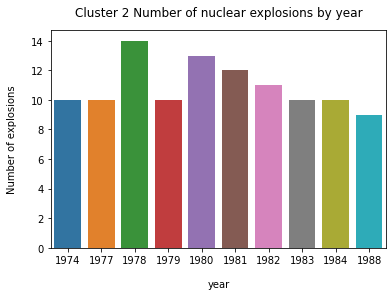

In [ ]:
yr3 = clust_3['year'].value_counts()[:10]
sns.barplot(x = yr3.index, y=yr3.values)
plt.title("Cluster 2 Number of nuclear explosions by year",pad = 14)
plt.xlabel('year', labelpad = 14)
plt.ylabel('Number of explosions', labelpad = 14)
plt.show()

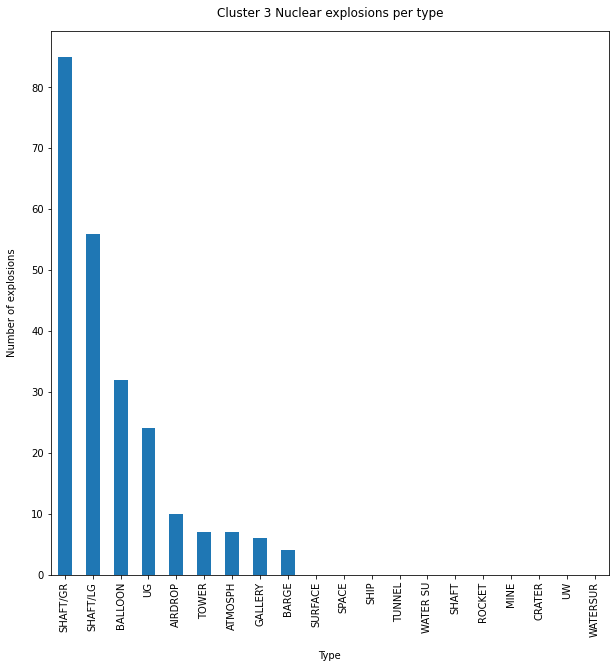

In [ ]:
#what are the numbers of explosion per type
plt.figure(figsize=(10,10))
clust_3["type"].value_counts().plot(kind = 'bar')
plt.title("Cluster 3 Nuclear explosions per type", pad = 14)
plt.xlabel("Type", labelpad = 14)
plt.ylabel("Number of explosions", labelpad=14)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

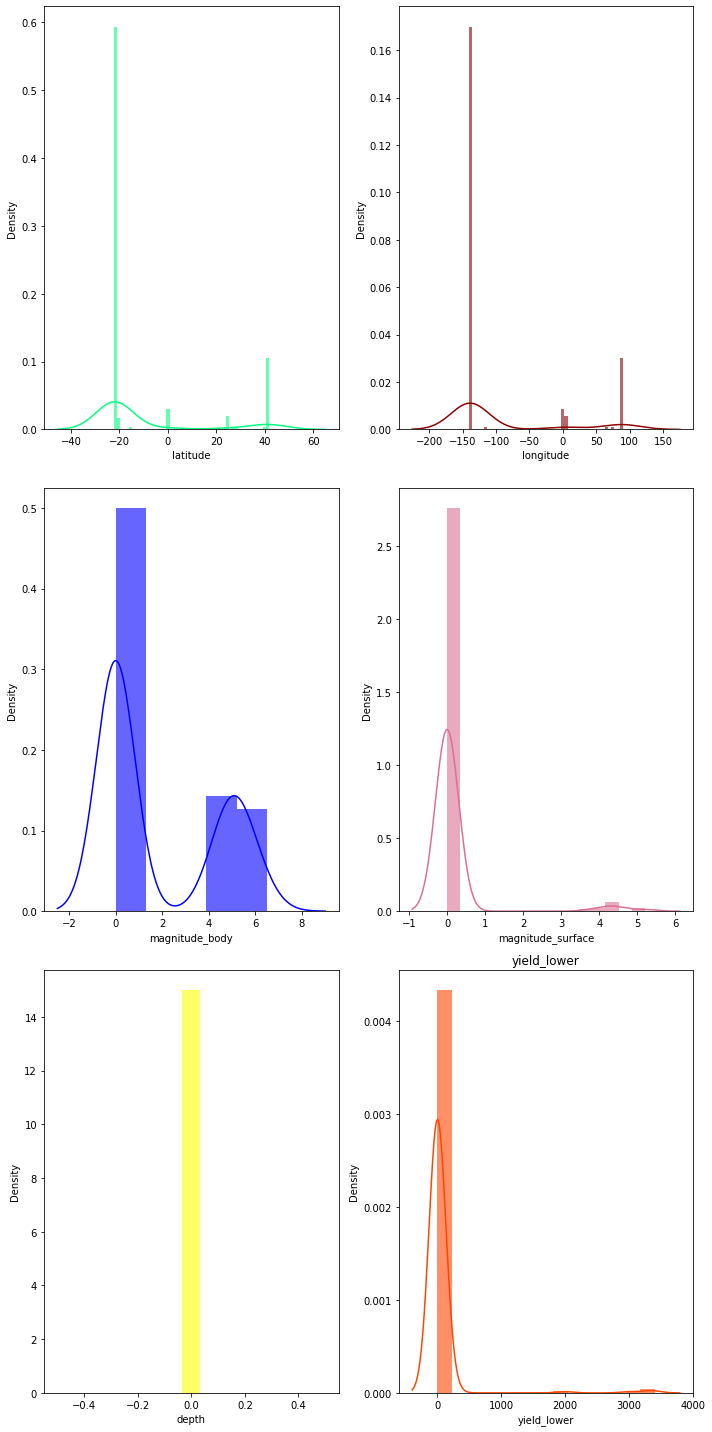

In [ ]:
# previewing the histograms of each variable
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 20))

cols = ['latitude','longitude','magnitude_body','magnitude_surface','depth','yield_lower']
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.distplot(clust_3[col], ax = ax, color = color, hist_kws = dict(alpha = 0.6),)
    plt.title(col)
    
plt.tight_layout()

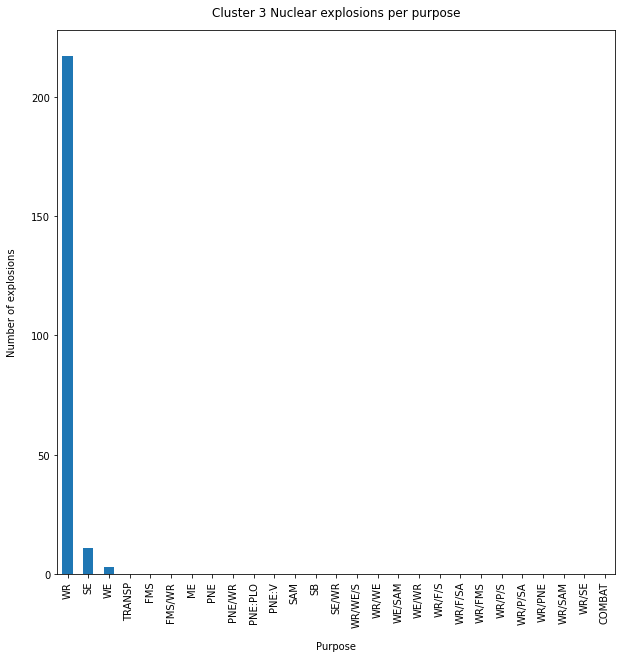

In [ ]:
#what are the numbers of explosion per type
plt.figure(figsize=(10,10))
clust_3["purpose"].value_counts().plot(kind = 'bar')
plt.title("Cluster 3 Nuclear explosions per purpose", pad = 14)
plt.xlabel("Purpose", labelpad = 14)
plt.ylabel("Number of explosions", labelpad=14)
plt.show()

### d) Cluster 4

In [ ]:
clust_4.shape

(8, 19)

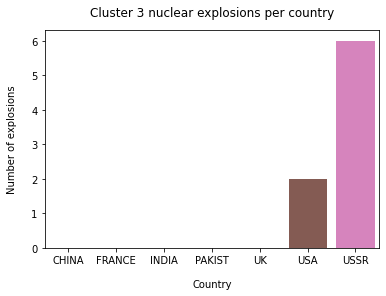

In [ ]:
#nuclear explosions per country
tot4 = clust_4['country'].value_counts()
sns.barplot(x = tot4.index, y=tot4.values)
plt.title("Cluster 3 nuclear explosions per country",pad = 14)
plt.xlabel('Country', labelpad = 14)
plt.ylabel('Number of explosions', labelpad = 14)
plt.show()

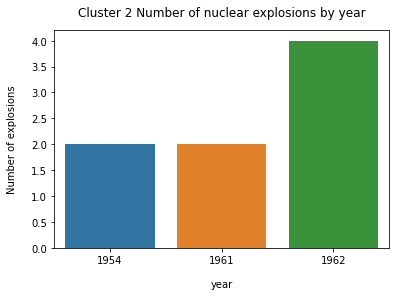

In [ ]:
yr4 = clust_4['year'].value_counts()[:10]
sns.barplot(x = yr4.index, y=yr4.values)
plt.title("Cluster 2 Number of nuclear explosions by year",pad = 14)
plt.xlabel('year', labelpad = 14)
plt.ylabel('Number of explosions', labelpad = 14)
plt.show()

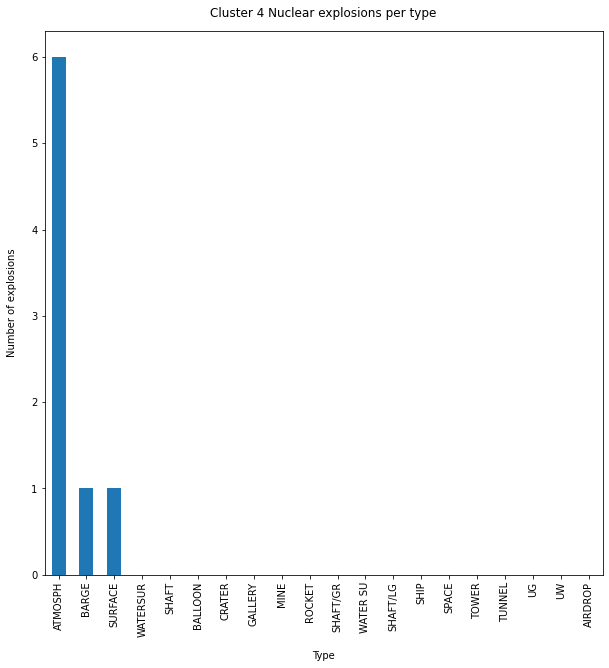

In [ ]:
#what are the numbers of explosion per type
plt.figure(figsize=(10,10))
clust_4["type"].value_counts().plot(kind = 'bar')
plt.title("Cluster 4 Nuclear explosions per type", pad = 14)
plt.xlabel("Type", labelpad = 14)
plt.ylabel("Number of explosions", labelpad=14)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

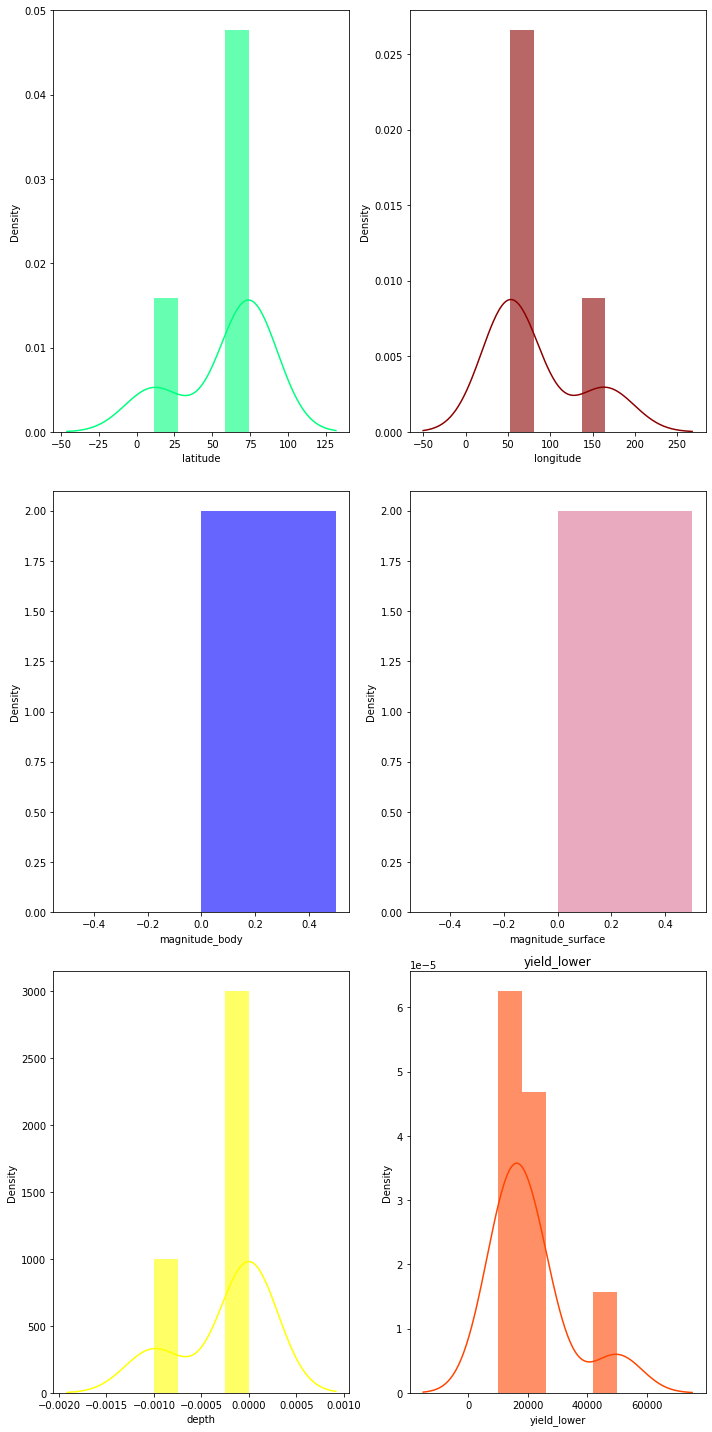

In [ ]:
# previewing the histograms of each variable
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 20))

cols = ['latitude','longitude','magnitude_body','magnitude_surface','depth','yield_lower']
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.distplot(clust_4[col], ax = ax, color = color, hist_kws = dict(alpha = 0.6),)
    plt.title(col)
    
plt.tight_layout()

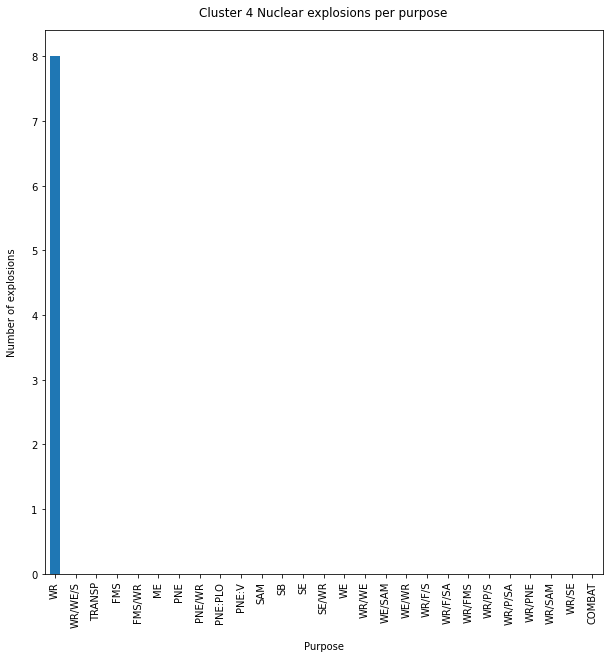

In [ ]:
#what are the numbers of explosion per type
plt.figure(figsize=(10,10))
clust_4["purpose"].value_counts().plot(kind = 'bar')
plt.title("Cluster 4 Nuclear explosions per purpose", pad = 14)
plt.xlabel("Purpose", labelpad = 14)
plt.ylabel("Number of explosions", labelpad=14)
plt.show()

### Observations

CLUSTER 1:
1. There are 770 explosions in this cluster.
2. The explosions mainly occurred between 1976 and 1987.
3. The explosions were deployed from a vertical underground shaft.
4. The explosions were mostly detonated at depths of 0 to 0.1KM underground.
5. Most of the explosions were for nuclear weapons research.
6. The USSR had the highest number of explosions followed by the USA. France had the least.

CLUSTER 2:
1. There are 1036 explosions in this cluster.
2. USA had the highest number of explosions followed by the USSR.
3. The explosions mainly occurred between 1958 to 1968.
4. The explosions were deployed from a vertical underground shaft.
5. The explosions were mainly detonated at a height 0f 0 to 10KM above the ground.
6. The explosions were mainly for nuclear weapons research.

CLUSTER 3:
1. There are 231 explosions in this cluster.
2. France had the highest number of explosions followed by China while USA and USSR had the least number of explosions.
3. The explosions mostly occured between 1977 to 1988.
4. The weapons were deployed from a ground mounted vertical shaft.
5. The weapons were mostly detonated on the ground.
6. The explosions were mostly from nuclear weapons research.

CLUSTER 4:
1. There are 8 explosions in this cluster.
2. The USSR had the highest number of explosions followed by the USA. Other countries had none.
3. The explosions occured in 1954, 1961 and 1962.
4. Atmospheric deployment was used in deploying the weapons.
5. The weapons were detoned on the ground.
5. The explosions were from nuclear weapons research.

# <font color='#2F4F4F'>6. Classification Modelling</font>

In [ ]:
#we will first do a normal classification and get the accuracy score
#Selecting our variables
X= n_df.iloc[:,[0,4,5,6,7,8,9,10,13,14,15,16,17]].values
y = n_df.loc[:, n_df.columns=='KMeans Cluster Group'].values

#importing our train_test_split library and having  a test size of 20% of the dataset
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
#performing feature scaling on our dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
#importing our classifier base and ensemble models and intatntiating them in our model

#
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.svm import SVC                         # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier

# We will also use our ensemble classifiers
from sklearn.ensemble import BaggingClassifier           # Bagging Meta-Estimator Classifier
from sklearn.ensemble import RandomForestClassifier      # RandomForest Classifier 
from sklearn.ensemble import AdaBoostClassifier          # AdaBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier  # AdaBoost GradientBoostingClassifier
import xgboost as xgb                                    # Importing the XGBoost library

# Below, we make instances of the classifiers; LogisticRegression, 
# DecisionTreeClassifier, SVC, GaussianNB, KNeighborsClassifier, GaussianNB.
# As we will get to see, each of the classifiers take different parameters.
# ---
# 
logistic_classifier = LogisticRegression()
decision_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
naive_classifier = GaussianNB() 

# We start implementing ensemble methods by first using Bagging Classifiers
# ---
# Uncomment each classifier and run the respective code
# ---
bagging_meta_classifier = BaggingClassifier()
random_forest_classifier = RandomForestClassifier()

# Boosting Classifiers
# ---
ada_boost_classifier = AdaBoostClassifier()
gbm_classifier = GradientBoostingClassifier() 
xg_boost_classifier = xgb.XGBClassifier() 

# Now using these classifiers to fit our data, X_train and y_train.
# By fitting we mean we train our classifiers based on the train dataset.
# ---
# Upon running this cell, we should have classifiers that can predict 
# whether a person will buy a car or not.
# ---
#
logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
naive_classifier.fit(X_train, y_train)

# Bagging Classifiers
# ---
bagging_meta_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)

# Boosting Classifiers
# ---
ada_boost_classifier.fit(X_train, y_train)
gbm_classifier.fit(X_train, y_train)
xg_boost_classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# We now predict the test set results.  

logistic_y_prediction = logistic_classifier.predict(X_test) 
decision_y_prediction = decision_classifier.predict(X_test) 
svm_y_prediction = svm_classifier.predict(X_test) 
knn_y_prediction = knn_classifier.predict(X_test) 
naive_y_prediction = naive_classifier.predict(X_test) 

# Bagging Classifiers
# ---
bagging_y_classifier = bagging_meta_classifier.predict(X_test) 
random_forest_y_classifier = random_forest_classifier.predict(X_test) 

# Boosting Classifiers
# ---
ada_boost_y_classifier = ada_boost_classifier.predict(X_test)
gbm_y_classifier = gbm_classifier.predict(X_test)
xg_boost_y_classifier = xg_boost_classifier.predict(X_test)

In [ ]:
# We then import evaluation metrics to determine the accuracy of classifiers
# ---
# 
from sklearn.metrics import classification_report, accuracy_score 


print("Logistic Regression Classifier", accuracy_score(logistic_y_prediction, y_test))
print("Decision Trees Classifier", accuracy_score(decision_y_prediction, y_test))
print("SVN Classifier", accuracy_score(svm_y_prediction, y_test))
print("KNN Classifier", accuracy_score(knn_y_prediction, y_test))
print("Naive Bayes Classifier", accuracy_score(naive_y_prediction, y_test))

# Bagging Classifiers
# ---
print("Bagging Classifier", accuracy_score(bagging_y_classifier, y_test))
print("Random Forest Classifier", accuracy_score(random_forest_y_classifier, y_test))

# Boosting Classifiers
# ---
print("Ada Boost Classifier", accuracy_score(ada_boost_y_classifier, y_test))
print("GBM Classifier", accuracy_score(gbm_y_classifier, y_test))
print("XGBoost Classifier", accuracy_score(xg_boost_y_classifier, y_test))

Logistic Regression Classifier 0.9755501222493888
Decision Trees Classifier 0.9364303178484108
SVN Classifier 0.9657701711491442
KNN Classifier 0.9731051344743277
Naive Bayes Classifier 0.3643031784841076
Bagging Classifier 0.941320293398533
Random Forest Classifier 0.9682151589242054
Ada Boost Classifier 0.9095354523227384
GBM Classifier 0.9706601466992665
XGBoost Classifier 0.9731051344743277


The models with the highest accuracy scores are;
1. Logistic Regression classifier = 0.9755501222493888
2. KNN and XGBoost Classifier = 0.9731051344743277
3. Random Forest and GBM classifier = 0.9706601466992665

In [ ]:
#printing the classification report of our models
print('Logistic classifier:')
print(classification_report(y_test, logistic_y_prediction))

print('Random Forest Classifier:')
print(classification_report(y_test, random_forest_y_classifier))

print('XGBoost Classifier:')
print(classification_report(y_test, xg_boost_y_classifier))

print('KNN Classifier:')
print(classification_report(y_test, knn_y_prediction))

print('GBM Classifier:')
print(classification_report(y_test, gbm_y_classifier)) 

Logistic classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       149
           1       1.00      0.96      0.98       214
           2       1.00      0.98      0.99        45
           3       0.50      1.00      0.67         1

    accuracy                           0.98       409
   macro avg       0.86      0.98      0.90       409
weighted avg       0.98      0.98      0.98       409

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       149
           1       0.98      0.97      0.97       214
           2       0.96      0.98      0.97        45
           3       1.00      1.00      1.00         1

    accuracy                           0.97       409
   macro avg       0.97      0.98      0.98       409
weighted avg       0.97      0.97      0.97       409

XGBoost Classifier:
              precision    recall  f1-score   support

        

1. The logistic model has the highest accuracy but lowest precision in classifying class 3. We will therefore ignore this model.
2. XGBoost has a low precision in predicting class 3. We will therefore ignore this model.
3. The random Forest, KNN and GBM models have satisfactory accuracy and precision values. We will perform validation on this mdels and see how they perform.

### Model Cross Validation

In [ ]:
#Cross validation will help us in determining whether the outliers affected our
# models in any way
#We will perform KFold cross validation.
# Importing our KFold model
from sklearn.model_selection import KFold
X= n_df.iloc[:,[0,4,5,6,7,8,9,10,13,14,15,16,17]].values
y = n_df.loc[:, n_df.columns=='KMeans Cluster Group'].values

#performing feature scaling on our dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#we will use 5 splits
folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
rand_accuracy = [] # array to hold accuracy values of the random forest model
knn_accuracy = [] # array to hold accuracy values of the KNN model
gbm_accuracy = [] # array to hold accuracy values of the GBM model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  # With 5 folds
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit our models 
  random_forest_classifier.fit(X_train, y_train)
  knn_classifier.fit(X_train, y_train)
  gbm_classifier.fit(X_train, y_train)

  # assess the accuraccy of the model
  rand_pred = random_forest_classifier.predict(X_test)
  knn_pred = knn_classifier.predict(X_test)
  gbm_pred = gbm_classifier.predict(X_test)
  
  r_acc = accuracy_score(rand_pred, y_test)
  knn_acc = accuracy_score(knn_pred, y_test)
  gbm_acc = accuracy_score(gbm_pred, y_test)

  #adding our scores to our array
  rand_accuracy.append(r_acc)
  knn_accuracy.append(knn_acc)
  gbm_accuracy.append(gbm_acc)

print("Random Forest Accuracy Scores:",rand_accuracy)
print("KNN Accuracy Scores:",knn_accuracy)
print("GBM Accuracy Scores:",gbm_accuracy)
  
  

we are using 5 folds


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DataConversionWa

Random Forest Accuracy Scores: [0.9877750611246944, 0.9902200488997555, 0.9559902200488998, 0.9902200488997555, 0.9144254278728606]
KNN Accuracy Scores: [0.9584352078239609, 0.960880195599022, 0.9486552567237164, 0.9657701711491442, 0.9535452322738386]
GBM Accuracy Scores: [0.9877750611246944, 0.980440097799511, 0.9462102689486552, 0.9731051344743277, 0.9242053789731052]


In [ ]:
#getting the average scores in our lists
print("Random Forest Average Accuracy Score:", sum(rand_accuracy)/len(rand_accuracy))
print("KNN Average Accuracy Score:", sum(knn_accuracy)/len(knn_accuracy))
print("GBM Average Accuracy Score:", sum(gbm_accuracy)/len(gbm_accuracy))

Random Forest Average Accuracy Score: 0.9677261613691931
KNN Average Accuracy Score: 0.9574572127139364
GBM Average Accuracy Score: 0.9623471882640586


1. The Knn model has a lowest accuracy score when presented with previously unseen data.
2. The random forest has the highest accuracy score when presented with previously unseen data. We will use this model to perform our classification.

###  Model Hyperparameter Tuning

In [ ]:
#We will perform hyperparameter tuning Bayesian optimisation 

# We will import the hyperopt library which will helps us perform bayesian optimisation

from hyperopt import hp, fmin, tpe, STATUS_OK
from sklearn.model_selection import cross_val_score


# Setting up a our space dictionary

space = {'max_depth': hp.quniform ('max_depth', 10,1200,10), 
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5)}

# 2. Setting up our objective function
# ----
#
def objective(space): 
    classifier = RandomForestClassifier(max_depth = space['max_depth'],
                                 min_samples_leaf = space['min_samples_leaf'])
    
    accuracy = cross_val_score(classifier, X_train, y_train, cv = 4).mean() 

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

# 3. Running our bayesian optimizer
# ---
#
best = fmin(fn= objective,                        # the objective function to miminize / the loss function to minimize
            space = space,                        # the range of input values to test during optimisation
            algo= tpe.suggest,                    # the search algorithm to use
            max_evals = 100,                      # the no. of iteration to perform
            rstate=np.random.RandomState(42))     # the randomstate for reproducability / to get the same result when we run the code

# printing out our outcome
best

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

  1%|          | 1/100 [00:00<01:09,  1.43it/s, best loss: -0.7059902200488998]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

  2%|▏         | 2/100 [00:01<01:08,  1.43it/s, best loss: -0.797677261613692] 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

  3%|▎         | 3/100 [00:02<01:06,  1.46it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

  4%|▍         | 4/100 [00:02<01:05,  1.46it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

  5%|▌         | 5/100 [00:03<01:04,  1.48it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

  6%|▌         | 6/100 [00:04<01:01,  1.52it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

  7%|▋         | 7/100 [00:04<01:00,  1.53it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

  8%|▊         | 8/100 [00:05<01:00,  1.52it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

  9%|▉         | 9/100 [00:06<01:00,  1.50it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 10%|█         | 10/100 [00:06<00:59,  1.52it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 11%|█         | 11/100 [00:07<01:04,  1.38it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 12%|█▏        | 12/100 [00:08<01:01,  1.43it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 13%|█▎        | 13/100 [00:08<00:59,  1.46it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 14%|█▍        | 14/100 [00:09<00:59,  1.45it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 15%|█▌        | 15/100 [00:10<00:57,  1.48it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 16%|█▌        | 16/100 [00:10<00:56,  1.48it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 17%|█▋        | 17/100 [00:11<00:56,  1.48it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 18%|█▊        | 18/100 [00:12<00:54,  1.50it/s, best loss: -0.797677261613692]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 19%|█▉        | 19/100 [00:12<00:55,  1.47it/s, best loss: -0.8270171149144254]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 20%|██        | 20/100 [00:13<00:55,  1.45it/s, best loss: -0.8374083129584352]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 21%|██        | 21/100 [00:14<00:55,  1.43it/s, best loss: -0.8374083129584352]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 22%|██▏       | 22/100 [00:15<00:55,  1.40it/s, best loss: -0.8374083129584352]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 23%|██▎       | 23/100 [00:15<00:54,  1.41it/s, best loss: -0.8374083129584352]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



 24%|██▍       | 24/100 [00:16<00:56,  1.35it/s, best loss: -0.852078239608802] 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 25%|██▌       | 25/100 [00:17<00:57,  1.31it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 26%|██▌       | 26/100 [00:18<00:58,  1.26it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 27%|██▋       | 27/100 [00:19<00:57,  1.26it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 28%|██▊       | 28/100 [00:19<00:56,  1.27it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 29%|██▉       | 29/100 [00:20<00:55,  1.29it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 30%|███       | 30/100 [00:21<00:53,  1.31it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 31%|███       | 31/100 [00:22<00:53,  1.29it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 32%|███▏      | 32/100 [00:22<00:51,  1.32it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 33%|███▎      | 33/100 [00:23<00:49,  1.35it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 34%|███▍      | 34/100 [00:24<00:50,  1.31it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 35%|███▌      | 35/100 [00:25<00:48,  1.35it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 36%|███▌      | 36/100 [00:25<00:47,  1.35it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 37%|███▋      | 37/100 [00:26<00:47,  1.33it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 38%|███▊      | 38/100 [00:27<00:46,  1.35it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 39%|███▉      | 39/100 [00:28<00:47,  1.28it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 40%|████      | 40/100 [00:28<00:46,  1.29it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 41%|████      | 41/100 [00:29<00:45,  1.29it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 42%|████▏     | 42/100 [00:30<00:46,  1.24it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 43%|████▎     | 43/100 [00:31<00:44,  1.29it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 44%|████▍     | 44/100 [00:31<00:41,  1.33it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 45%|████▌     | 45/100 [00:32<00:41,  1.33it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 46%|████▌     | 46/100 [00:33<00:38,  1.39it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 47%|████▋     | 47/100 [00:33<00:36,  1.43it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



 48%|████▊     | 48/100 [00:34<00:38,  1.35it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 49%|████▉     | 49/100 [00:35<00:37,  1.37it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 50%|█████     | 50/100 [00:36<00:36,  1.38it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 51%|█████     | 51/100 [00:36<00:35,  1.38it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 52%|█████▏    | 52/100 [00:37<00:34,  1.38it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 53%|█████▎    | 53/100 [00:38<00:33,  1.39it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 54%|█████▍    | 54/100 [00:39<00:34,  1.34it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 55%|█████▌    | 55/100 [00:39<00:32,  1.39it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 56%|█████▌    | 56/100 [00:40<00:31,  1.41it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 57%|█████▋    | 57/100 [00:41<00:31,  1.38it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 58%|█████▊    | 58/100 [00:42<00:31,  1.32it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 59%|█████▉    | 59/100 [00:42<00:30,  1.35it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 60%|██████    | 60/100 [00:43<00:29,  1.37it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 61%|██████    | 61/100 [00:44<00:27,  1.41it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 62%|██████▏   | 62/100 [00:44<00:27,  1.41it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 63%|██████▎   | 63/100 [00:45<00:26,  1.37it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 64%|██████▍   | 64/100 [00:46<00:26,  1.37it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 65%|██████▌   | 65/100 [00:47<00:25,  1.38it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 66%|██████▌   | 66/100 [00:47<00:25,  1.34it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 67%|██████▋   | 67/100 [00:48<00:25,  1.32it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 68%|██████▊   | 68/100 [00:49<00:24,  1.33it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 69%|██████▉   | 69/100 [00:50<00:24,  1.28it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 70%|███████   | 70/100 [00:51<00:23,  1.27it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 71%|███████   | 71/100 [00:51<00:22,  1.27it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 72%|███████▏  | 72/100 [00:52<00:21,  1.28it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 73%|███████▎  | 73/100 [00:53<00:21,  1.28it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 74%|███████▍  | 74/100 [00:54<00:19,  1.32it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 75%|███████▌  | 75/100 [00:54<00:18,  1.33it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 76%|███████▌  | 76/100 [00:55<00:18,  1.26it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 77%|███████▋  | 77/100 [00:56<00:18,  1.26it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 78%|███████▊  | 78/100 [00:57<00:17,  1.29it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 79%|███████▉  | 79/100 [00:58<00:15,  1.32it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 80%|████████  | 80/100 [00:58<00:15,  1.25it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 81%|████████  | 81/100 [00:59<00:14,  1.28it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 82%|████████▏ | 82/100 [01:00<00:13,  1.29it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 83%|████████▎ | 83/100 [01:01<00:13,  1.29it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 84%|████████▍ | 84/100 [01:02<00:12,  1.27it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 85%|████████▌ | 85/100 [01:02<00:11,  1.32it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 86%|████████▌ | 86/100 [01:03<00:10,  1.29it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 87%|████████▋ | 87/100 [01:04<00:10,  1.30it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 88%|████████▊ | 88/100 [01:04<00:09,  1.33it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 89%|████████▉ | 89/100 [01:05<00:08,  1.36it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 90%|█████████ | 90/100 [01:06<00:07,  1.31it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 91%|█████████ | 91/100 [01:07<00:06,  1.30it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 92%|█████████▏| 92/100 [01:07<00:05,  1.36it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 93%|█████████▎| 93/100 [01:08<00:05,  1.27it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 94%|█████████▍| 94/100 [01:09<00:04,  1.33it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 95%|█████████▌| 95/100 [01:10<00:03,  1.38it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 96%|█████████▌| 96/100 [01:10<00:02,  1.37it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 97%|█████████▋| 97/100 [01:11<00:02,  1.36it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 98%|█████████▊| 98/100 [01:12<00:01,  1.37it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

 99%|█████████▉| 99/100 [01:13<00:00,  1.39it/s, best loss: -0.8911980440097799]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

100%|██████████| 100/100 [01:14<00:00,  1.35it/s, best loss: -0.8911980440097799]


{'max_depth': 680.0, 'min_samples_leaf': 0.03342595137877613}

In [ ]:
# Let's now perform our classification with our optimal hyperparameters  
#we will first do a normal classification and get the accuracy score
#Selecting our variables
X= n_df.iloc[:,[0,4,5,6,7,8,9,10,13,14,15,16,17]].values
y = n_df.loc[:, n_df.columns=='KMeans Cluster Group'].values

#importing our train_test_split library and having  a test size of 20% of the dataset
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


random_forest_classifier = RandomForestClassifier(max_depth = best['max_depth'], 
                                             min_samples_leaf = best['min_samples_leaf'], random_state=42)

# Fitting our data
random_forest_classifier.fit(X_train, y_train)

# Making our predictions
# ---
#
random_forest_y_classifier = random_forest_classifier.predict(X_test)

# Calculating our metrics 
print("Random Forest Classifier", accuracy_score(random_forest_y_classifier, y_test))
print('Random Forest Classifier:')
print(classification_report(y_test, random_forest_y_classifier))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Forest Classifier 0.9144254278728606
Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       149
           1       0.90      0.97      0.93       214
           2       1.00      0.80      0.89        45
           3       0.00      0.00      0.00         1

    accuracy                           0.91       409
   macro avg       0.70      0.66      0.68       409
weighted avg       0.91      0.91      0.91       409



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy Score with the tuned hyper parameters is 0.97

In [ ]:
# Let's now perform our classification with our optimal hyperparameters  
#we will first do a normal classification and get the accuracy score
#Selecting our variables
X= n_df.iloc[:,[0,4,5,6,7,8,9,10,13,14,15,16,17]].values
y = n_df.loc[:, n_df.columns=='KMeans Cluster Group'].values

#importing our train_test_split library and having  a test size of 20% of the dataset
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


random_forest_classifier = RandomForestClassifier()

# Fitting our data
random_forest_classifier.fit(X_train, y_train)

# Making our predictions
# ---
#
random_forest_y_classifier = random_forest_classifier.predict(X_test)

# Calculating our metrics 
print("Random Forest Classifier", accuracy_score(random_forest_y_classifier, y_test))
print('Random Forest Classifier:')
print(classification_report(y_test, random_forest_y_classifier))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Forest Classifier 0.9706601466992665
Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       149
           1       0.98      0.97      0.98       214
           2       0.96      0.98      0.97        45
           3       1.00      1.00      1.00         1

    accuracy                           0.97       409
   macro avg       0.97      0.98      0.98       409
weighted avg       0.97      0.97      0.97       409



The accuracy score remains unchanged.

# <font color='#2F4F4F'>7.Recommendation</font>

1. In trying to predict the clasification of a new nuclear test, the random forest classifier model should be used. This gives an accuracy of 97%.

# <font color='#2F4F4F'>8.Challenging our Solution</font>

#### a) Did we have the right question? 
Yes. The question of wanting to determine the classification of a new nuclear test is relevant to the organisation.


#### b) Did we have the right data?
Yes. Since the dataset dataset was sourced from the Stockholm International Peace Research Institute, it is was the right data for answering the research question.

#### c) What can be done to improve the solution?
Collection of additional data for use in training the model.
The current data can also be used in creating the models.